# Project: Investigate a Dataset (TMDb_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#analysis">Exploratory Data Analysis</a>
    <ul>
    <li><a href="#Q1">Question #1: Movies which had most and least profit</a></li>
    <li><a href="#Q2">Question #2: Movies with largest and lowest budgets</a></li>
    <li><a href="#Q3">Question #3: Which Director has produced the best movies in 2014?</a></li>
    <li><a href="#Q4">Question #4: Average runtime of all the movies.</a></li>
    <li><a href="#Q5">Question #5: In which year we had most no.of profitable movies.</a></li>
    </ul>
</li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

The Movie Database (TMDb) is a community built movie and TV database. Every piece of data has been added by our amazing community dating back to 2008. TMDb's strong international focus and breadth of data is largely unmatched and something we're incredibly proud of. Put simply, we live and breathe community and that's precisely what makes us different.

In this presentation, based on this dataset various questions will be answered for the curious minds. For example who are the most famous actors? Movie genres, how did they change all over the years. What about the revenues, budget and movie popularity, do they correlate weach other. So Lets start exploring the dataset.





In [12]:
#loading necessary libraries

import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable. 
> .



In [13]:
# Load your data

data = pd.read_csv('tmdb-movies.csv')
data.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [14]:
print(data.shape)


(10866, 21)


In [15]:
print(list(data.columns.values))


['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [17]:
sum(data.duplicated())

1

In [18]:
data.drop_duplicates(inplace=True)
#data.dropna(inplace=True)


In [19]:
data['revenue']=data['revenue'].astype(np.int64)
data['budget']=data['budget'].astype(np.int64)
data.insert(2,'profit_earned',data['revenue']-data['budget'])

In [21]:
data.describe()


,id,profit_earned,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,2.520261e+07,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,9.659103e+07,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,-4.139124e+08,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.000000e+00,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.000000e+00,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,9.092453e+06,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,2.544506e+09,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='analysis'></a>
## Exploratory Data Analysis



<a id='Q1'></a>
### Question 1 : Movies which had most and least profit

In [49]:
def calculate(column):
    #for highest earned profit
    high= data[column].idxmax()
    high_details=pd.DataFrame(data.loc[high])
    
    #for lowest earned profit
    low= data[column].idxmin()
    low_details=pd.DataFrame(data.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info



In [50]:
calculate('profit_earned')

,1386,2244
id,19995,46528
imdb_id,tt0499549,tt1032751
profit_earned,2544505847,-413912431
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage,http://www.avatarmovie.com/,http://www.iamrogue.com/thewarriorsway
director,James Cameron,Sngmoo Lee


In [51]:
calculate('revenue')

,1386,48
id,19995,265208
imdb_id,tt0499549,tt2231253
profit_earned,2544505847,-30000000
popularity,9.43277,2.93234
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
homepage,http://www.avatarmovie.com/,NaN
director,James Cameron,Simon West


>"Column with id 1386 shows the highest earned profit i.e 2.5 billion .
Whereas the column with id 2244 shows the lowest earned profit i.e -413,912,431
also Column with id 1386 shows the highest revenue

<a id='Q2'></a>
### Question 2 : Movies with largest and lowest budgets

In [52]:
calculate('budget')

,2244,30
id,46528,280996
imdb_id,tt1032751,tt3168230
profit_earned,-413912431,29355203
popularity,0.25054,3.92733
budget,425000000,0
revenue,11087569,29355203
original_title,The Warrior's Way,Mr. Holmes
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Ian McKellen|Milo Parker|Laura Linney|Hattie M...
homepage,http://www.iamrogue.com/thewarriorsway,http://www.mrholmesfilm.com/
director,Sngmoo Lee,Bill Condon


>Column with id 2244 shows the largest budget i.e 425 million dollar.
Whereas the column with id 2618 shows the smallest budget i.e 1 dollar

<a id='Q3'></a>
### Question 3 : Which Director has produced the best movies in 2014?

In [20]:
df_dir=data[data['release_year'] == 2014]
df_dir

,id,imdb_id,profit_earned,popularity,budget,revenue,original_title,cast,homepage,director,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_1,genres_2,genres_3,genres_4,genres_5
629,157336,tt0816692,456752480,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,http://www.interstellarmovie.net/,Christopher Nolan,...,6498,8.0,2014,1.519800e+08,5.726906e+08,Adventure,Drama,Science Fiction,None,None
630,118340,tt2015381,603312399,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,http://marvel.com/guardians,James Gunn,...,5612,7.9,2014,1.565855e+08,7.122911e+08,Action,Science Fiction,Adventure,None,None
631,100402,tt1843866,544766572,12.971027,170000000,714766572,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,http://www.captainamericathewintersoldiermovie...,Joe Russo|Anthony Russo,...,3848,7.6,2014,1.565855e+08,6.583651e+08,Action,Adventure,Science Fiction,None,None
632,245891,tt2911666,58739897,11.422751,20000000,78739897,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,http://www.johnwickthemovie.com/,Chad Stahelski|David Leitch,...,2712,7.0,2014,1.842182e+07,7.252661e+07,Action,Thriller,None,None,None
633,131631,tt1951265,627100229,10.739009,125000000,752100229,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,http://www.thehungergames.movie/,Francis Lawrence,...,3590,6.6,2014,1.151364e+08,6.927528e+08,Science Fiction,Adventure,Thriller,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,276928,tt3678938,0,0.004282,0,0,Humpty Sharma Ki Dulhania,Varun Dhawan|Alia Bhatt|Ashutosh Rana|Siddhart...,NaN,Shashank Khaitan,...,23,6.4,2014,0.000000e+00,0.000000e+00,Drama,Comedy,Romance,None,None
1325,286817,tt3546114,0,0.032049,0,0,Anatomy of a Love Seen,Sharon Hinnendael|Jill Evyn|Constance Brenneman,NaN,Marina Rice Bader,...,18,4.2,2014,0.000000e+00,0.000000e+00,Romance,Drama,None,None,None
1326,250668,tt2548738,0,0.023872,0,0,Rich Hill,NaN,NaN,Tracy Droz Tragos|Andrew Droz Palermo,...,14,7.1,2014,0.000000e+00,0.000000e+00,Documentary,None,None,None,None
1327,258614,tt2966760,0,0.003504,0,0,Pantani: The Accidental Death of a Cyclist,NaN,NaN,James Erskine,...,11,6.5,2014,0.000000e+00,0.000000e+00,Documentary,None,None,None,None


In [21]:
director_data = df_dir.groupby('director').mean().vote_average
director_data

director
Aaron Katz|Martha Stephens    5.8
Abel Ferrara                  5.5
Adam Robitel                  5.9
Adam Wingard                  6.6
AdriÃ¡n GarcÃ­a Bogliano      5.6
                             ... 
Zak Hilditch                  6.1
Zak Knutson                   7.7
Zak Penn                      6.7
Zatella Beatty                7.2
ÃdÃ¡m CsÃ¡szi                 7.2
Name: vote_average, Length: 677, dtype: float64

In [22]:
sort_dir = director_data.sort_values(ascending=False) 
sort_dir.head()

director
Carl Tibbetts                    8.8
Paul Dugdale                     8.3
Damien Chazelle                  8.2
Stephen Daldry|Brett Sullivan    8.1
Christopher Nolan                8.0
Name: vote_average, dtype: float64

>I'm clearly able to list out the top 5 Directors of 2014 based on the mean calculated for the average ratings of various movies released by them in 2014. so, we can conclude that, 'Carl Tibbetts' with mean average rating of '8.8', wins, then comes
    <ul>
    <li>'Carl Tibbetts' with mean average rating of '8.3'.</li>
    <li>'Damien Chazelle ' with mean average rating of '8.2'.</li>
    <li>'Stephen Daldry|Brett Sullivan'with mean average rating of '8.1'.</li>
    <li>'Christopher Nolan ' with mean average rating of '8.0'.</li>
    </ul>


<a id='Q4'></a>
### Question 4 : Average runtime of all the movies.

In [23]:
# defining a function to find average of a column
def avg_fun(column):
    return data[column].mean()

In [24]:
#calling above function
avg_fun('runtime')

102.07179015186378

>So the average runtime a movie is 102 minutes.


<a id='Q5'></a>
### Question 5 : In which year we had most number of profitable movies.

In [25]:
profits_year = data.groupby('release_year')['profit_earned'].sum()

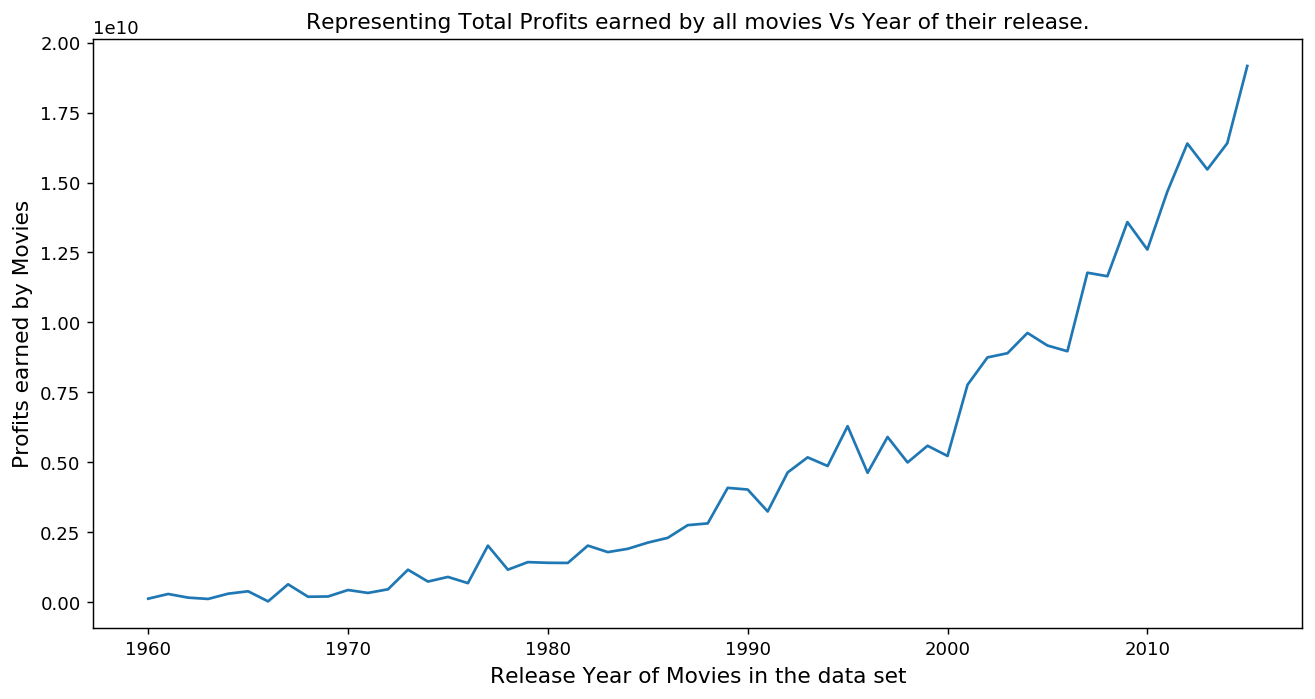

In [26]:
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
plt.ylabel('Profits earned by Movies', fontsize = 12)
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')
plt.plot(profits_year)

plt.show()

In [27]:
profits_year.idxmax()

2015

In [28]:
profits_year.max()

19165902961

>So we can conclude both graphically as well as by calculations that year 2015 was the year where movies made the highest profit = 1.9 billion.
